<a href="https://colab.research.google.com/github/Psychohistorian11/Fisica_II/blob/master/Clases/Taller_1_Movimiento_Arm%C3%B3nico_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Péndulo Simple

Un péndulo simple es un sistema físico compuesto por una masa atada al extremo de una cuerda ideal (inextensible de masa despreciable ). Un esquema del péndulo simple esta dado por :

![texto alternativo](https://drive.google.com/uc?export=download&id=1a-t-fet_9gVprunhj9IIbctE3KyZXPSO)

Las ecuación de movimiento para, el péndulo simple se puede escribir como :

$$m\frac{d^2\theta(t)}{dt^2}=-\frac{mg}{l}\sin{\theta}$$

Tal como esta la ecuación de movimiento, el sistema no es armónico simple, ya que la fuerza no es proporcional al desplazamiento.

Computacionalmente el tiempo lo tenemos discretizado entonces podemos reescribir la ecuación anterior en termino d subincices donde cada subindice indica un instante de tiempo

$$x_{new}\approx2x_{i}-x_{i-1}+a_{i}\Delta t ^2. \tag{1} $$  

para el sistema Péndulo simple:

$$a_{i}=-\frac{g}{l}\sin{\theta}$$

Velocidad del pendulo (derivada de la posición)

$$v_{new}= \frac{dx_{new}}{dt} = \frac{x_{new}-x_{i}}{dt} \tag{2}$$

# Energias


 $$E_{Potencial} =  m g h$$


En el caso del péndulo simple, la altura vertical $h$ se puede expresar en función del ángulo $\theta$ (siendo el angulo nuestra posición actual) y la longitud de la cuerda $l$ como:

$$h = l(1-cos(x_{new}))$$

Organizando:

 $$E_{Potencial} =  m g  l(1-cos(x_{new})) \tag{3}$$

 $$E_{Cinetica} = \frac{1}{2} m v_{new}^2  \tag{4}$$

 $$E_{Mecanica} = E_{Potencial} +  E_{Cinetica}  \tag{5}$$





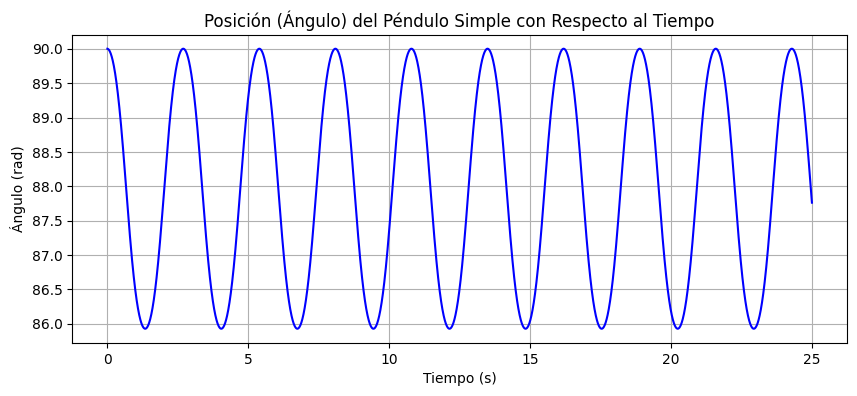

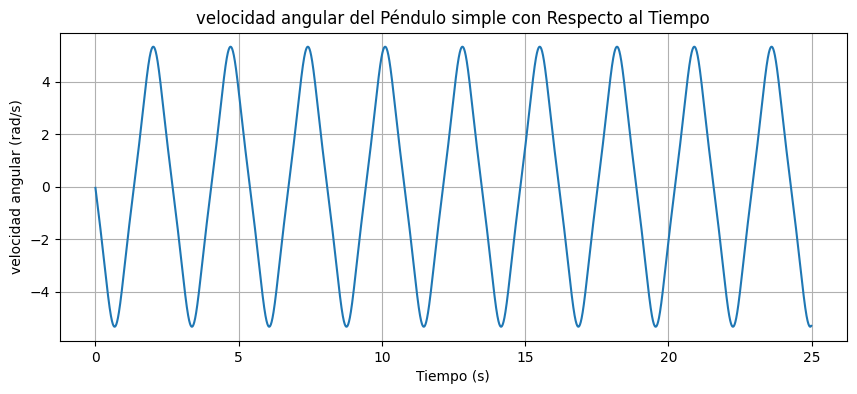

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def verletPendulumAlgorithm(x0,m,l,g=9.81,dt=0.005,nts=5000):
    """Condiciones iniciales del sistema
    x0  =  posición inicial, en este caso (sistema pendulo) Ángulo en radianes
    m   =  masa del objeto (utilizado sobre todo para las energias)
    l   =  longitud de la cuerda
    g   =  Aceleración devido a la gravedad
    dt  =  Paso del tiempo
    nts =  Numero de pasos o iteraciones que realizara la simulación
    """

    t = []                 # Lista para almacenar el tiempo
    theta_list = []        # Lista para almaceanr la posición
    angular_velocity = []  # Lista para almacenar la velocidad angular
    potential_energy = []  # Lista para almacenar la energía potencial
    kinetic_energy = []    # Lista para almacenar la energía cinética
    total_energy = []      # Lista para almacenar la energía mecánica

    #Condiciones iniciales
    x_i = x0

    for i in range(1,nts-1):
        acceleration = -(g / l) * np.sin(x_i) #Aceleración

        x_new = 2. * x_i - x0 + acceleration * dt ** 2 #posición
        v_new = (x_new - x_i)/dt #velocidad

        potential =  m*g*(l*(1-np.cos(x_new))) #Energia potencial
        kinetic = (1/2) * m * v_new**2 #Energia cinetica

        x0 = x_i# a la posición en el pasado le doy la posición actual
        x_i = x_new# a la posición actual le doy la posición en el futuro

        total = potential + kinetic #Energia mecanica

        #Agregar las variables a sus respectivas listas
        t.append(i * dt)
        theta_list.append(x_i)
        angular_velocity.append(v_new)
        potential_energy.append(potential)
        kinetic_energy.append(kinetic)
        total_energy.append(total)

    return t,theta_list,angular_velocity,potential_energy,kinetic_energy,total_energy

t,theta_values,angular_velocity,potential_energy,kinetic_energy,total_energy = verletPendulumAlgorithm(90,3,1.0)
plt.figure(figsize=(10, 4))
plt.plot(t, theta_values,color="blue")
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Posición (Ángulo) del Péndulo Simple con Respecto al Tiempo')
plt.grid()
plt.show()
plt.figure(figsize=(10.16, 4))
plt.plot(t, angular_velocity)
plt.xlabel('Tiempo (s)')
plt.ylabel('velocidad angular (rad/s)')
plt.title('velocidad angular del Péndulo simple con Respecto al Tiempo')
plt.grid()
plt.show()





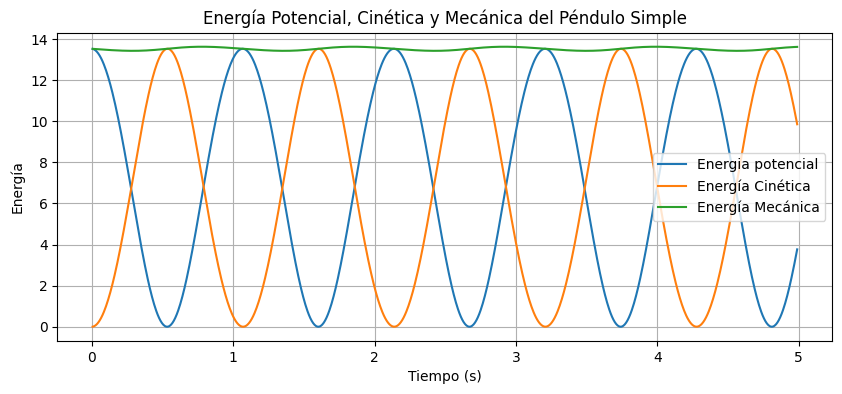

In [ ]:
#ENERGIES
t,theta_values,angular_velocity,potential_energy,kinetic_energy,total_energy = verletPendulumAlgorithm(90,3,1.0,g=9.81,dt=0.005,nts=1000)
# Graficar la energía potencial, cinética y mecánica en función del tiempo
plt.figure(figsize=(10, 4))
plt.plot(t, potential_energy,label="Energia potencial")
plt.plot(t, kinetic_energy, label='Energía Cinética')
plt.plot(t, total_energy, label='Energía Mecánica')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía')
plt.title('Energía Potencial, Cinética y Mecánica del Péndulo Simple')
plt.legend()
plt.grid()
plt.show()